In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
income = pd.read_csv('adult_income.csv')

In [3]:
income.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
income.columns = income.columns.str.replace('.','_')

In [5]:
income['income_map'] = income.income.map({'<=50K':0, '>50K': 1})
income['sex_map'] = income.sex.map({'Female':0, 'Male':1})
income['race_map']=income.race.map({'White':0, 'Black':1, 
                                    'Asian-Pac-Islander':2, 'Amer-Indian-Eskimo':3})
income['marital_map'] = income.marital_status.map({'Widowed':0, 'Divorced':1, 'Separated':2,
                                                  'Never-married':3, 'Married-civ-spouse':4,
                                                  'Married-spouse-absent':5, 'Married-AF-spouse':6})
income['rel_map']=income.relationship.map({'Not-in-family':0, 'Unmarried':0, 
                                           'Own-child':0, 'Other-relative':0, 
                                           'Husband':1, 'Wife':1})
income['work_map']=income.workclass.map({'?':0, 'Private':1, 'State-gov':2, 'Federal-gov':3, 
                                        'Self-emp-not-inc':4, 'Self-emp-inc': 5, 'Local-gov': 6,
                                        'Without-pay':7, 'Never-worked':8})

In [6]:
num_cols = ['age', 'sex_map', 'race_map','education_num', 'work_map', 
            'marital_map', 'rel_map', 'hours_per_week','capital_gain', 'capital_loss', 
            'fnlwgt', 'income_map']

In [7]:
income=income[num_cols].fillna(-9999)

In [8]:
income.head()

,age,sex_map,race_map,education_num,work_map,marital_map,rel_map,hours_per_week,capital_gain,capital_loss,fnlwgt,income_map
0,90,0,0.0,9,0,0,0,40,0,4356,77053,0
1,82,0,0.0,9,1,0,0,18,0,4356,132870,0
2,66,0,1.0,10,0,0,0,40,0,4356,186061,0
3,54,0,0.0,4,1,1,0,40,0,3900,140359,0
4,41,0,0.0,10,1,2,0,40,0,3900,264663,0


In [9]:
features=['age', 'sex_map', 'race_map','education_num', 'work_map', 
          'marital_map', 'rel_map', 'hours_per_week','capital_gain', 
          'capital_loss', 'fnlwgt']

target=['income_map']

In [10]:
X = income[features].values
y = income[target].values.flatten()

In [11]:
from sklearn.model_selection import train_test_split
    
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

# Random Forest Classifier

In [12]:
def random_forest():
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import GridSearchCV
    
    clf = RandomForestClassifier(random_state=0)
    grid_values = {'max_depth': np.arange(1,11,2), 'max_features': np.arange(1,11,2)}
    
    grid_clf = GridSearchCV(clf, param_grid = grid_values)
    grid_clf.fit(X, y)
    
    
    return grid_clf.best_estimator_

In [13]:
rdm_forest_clf = random_forest()

# Analysis of Income using the Machine learning Algorithms 

Evaluation

In [14]:
def evaluation(model):
    from sklearn.metrics import classification_report
    
    # This function gives provides verious evaluation metrics for the input model
    
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test, y_pred, target_names = ['Under 50k', 'Over 50k']))
    print('Training Set Accuracy Score: {:.2f}'.format(model.score(X_train, y_train)))
    print('Testing Set Accuracy Score: {:.2f}'.format(model.score(X_test, y_test)))

In [15]:
evaluation(rdm_forest_clf)

              precision    recall  f1-score   support

   Under 50k       0.86      0.95      0.90      6193
    Over 50k       0.76      0.51      0.61      1948

    accuracy                           0.84      8141
   macro avg       0.81      0.73      0.76      8141
weighted avg       0.84      0.84      0.83      8141

Training Set Accuracy Score: 0.84
Testing Set Accuracy Score: 0.84


Precision-Recall

The Precision-Recall curve shows the trade off between precision and recall scores as we vary the decision threshold for classification (using either using either a probability threshold or a decision function threshold).

In [16]:
def precision_recall(model):
    from sklearn.metrics import precision_recall_curve
    
    proba = model.predict_proba(X_test)
    
    precision, recall, threshold = precision_recall_curve(y_test, proba[:,1])
    
    plt.plot(precision, recall)
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.title('Precision-Recall Curve')

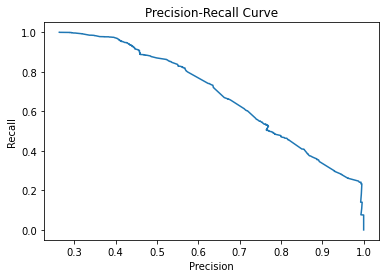

In [17]:
precision_recall(rdm_forest_clf)

Roc Curve

The ROC curve (Receiver Operating Charastic) preforms the same feat for the True Positive Rate (recall) and the False Positive Rate. 

In [18]:
def roc_curve(model):
    from sklearn.metrics import roc_curve, auc
    
    #scores = model.decision_function(X_test)
    proba = model.predict_proba(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, proba[:,1])
    
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve. AUC: {}'.format(auc(fpr, tpr)))

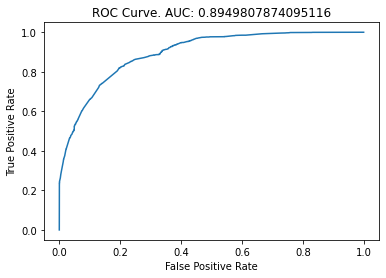

In [19]:
roc_curve(rdm_forest_clf)

Micro Average and Macro Average

When the micro average (each instance has same weight) preforms better than the macro average (each class has same weight) this is an indicator that the model is preforming better on the more frequent class. This holds true with the results from the evaluation function above, in which the model performed substantially better on the class earning less than $50,000.

In [20]:
from sklearn.metrics import precision_score

y_pred = rdm_forest_clf.predict(X_test)

micro_avg = precision_score(y_test, y_pred, average='micro')
macro_avg = precision_score(y_test, y_pred, average='macro')

print('Micro Average Precision Score: {:.2f}'.format(
    precision_score(y_test, y_pred, average='micro')))
print('Macro Average Precision Score: {:.2f}'.format(
    precision_score(y_test, y_pred, average='macro')))


Micro Average Precision Score: 0.84
Macro Average Precision Score: 0.81


##OUTCOME :Accuracy of Income Class in %

Confusion Matrix

In [21]:
def confusion(model):
    
    # Creats a confusion matrix/heatmap for the logistic regression models predicted values
    from sklearn.metrics import confusion_matrix
    
    y_pred = model.predict(X_test)
    confusion_mc = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(confusion_mc)

    plt.figure(figsize=(5.5,4))
    sns.heatmap(df_cm, annot=True)
    n1=model.score(X_test, y_test)
    plt.title('Model Accuracy:{:.2%}'.format(n1))

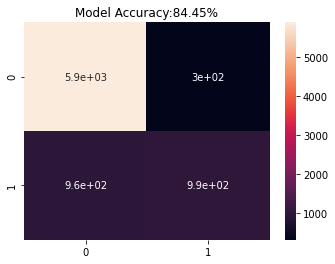

In [22]:
confusion(rdm_forest_clf)

# Income Class of Adults (Above and Below 50k)

In [23]:
while True:
    try:
        print('Press 1 to the Number of people earning $50,000')
        print('Press 2 to the Number of people earning $50,000')
        A=int(input())
    except ValueError:
        print("Sorry i didn't understand that")
        continue
    else:
        break
if A == 1:
  print('Number of people earning more than $50,000 out of 32561 people: {}'.format(
    len(income[income.income_map ==1])))
elif A == 2:
  print('Number of people earning less than $50,000 out of 32561 people: {}'.format(
    len(income[income.income_map ==0])))
else :
  print('Wrong input')

Press 1 to the Number of people earning $50,000
Press 2 to the Number of people earning $50,000
1
Number of people earning more than $50,000 out of 32561 people: 7841


In [24]:
details = pd.DataFrame(income)

### Analysis and Understand how Social-Economic conditions have an impact on Income 
Condtions are a)Sex,
              b)Race,
              c)Marital Status,
              d)Relationship Status and 
              e)Work Status

Analysis of Sex

In [25]:
def Sexincome (row):
   if row['income_map'] + row['sex_map'] == 0 :
      return 'Female less than 50k'
   if row['income_map'] + row['sex_map'] > 1 :
      return 'Male more than 50k'
   if row['income_map'] == 0 and row ['sex_map'] == 1 :
      return 'Male less than 50k'
   if row['income_map'] == 1 and row ['sex_map'] == 0 :
      return 'Female more than 50k'

In [26]:
details.apply (lambda row: Sexincome(row), axis=1)

0        Female less than 50k
1        Female less than 50k
2        Female less than 50k
3        Female less than 50k
4        Female less than 50k
                 ...         
32556      Male less than 50k
32557    Female less than 50k
32558      Male more than 50k
32559    Female less than 50k
32560      Male less than 50k
Length: 32561, dtype: object

In [27]:
details['Sexandtheirincome'] = details.apply (lambda row: Sexincome(row), axis=1)

In [28]:
details

,age,sex_map,race_map,education_num,work_map,marital_map,rel_map,hours_per_week,capital_gain,capital_loss,fnlwgt,income_map,Sexandtheirincome
0,90,0,0.0,9,0,0,0,40,0,4356,77053,0,Female less than 50k
1,82,0,0.0,9,1,0,0,18,0,4356,132870,0,Female less than 50k
2,66,0,1.0,10,0,0,0,40,0,4356,186061,0,Female less than 50k
3,54,0,0.0,4,1,1,0,40,0,3900,140359,0,Female less than 50k
4,41,0,0.0,10,1,2,0,40,0,3900,264663,0,Female less than 50k
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,1,0.0,10,1,3,0,40,0,0,310152,0,Male less than 50k
32557,27,0,0.0,12,1,4,1,38,0,0,257302,0,Female less than 50k
32558,40,1,0.0,9,1,4,1,40,0,0,154374,1,Male more than 50k
32559,58,0,0.0,9,1,0,0,40,0,0,151910,0,Female less than 50k


Analysis of Race

In [29]:
def Racerow (row):
   if row['income_map'] + row['race_map'] == 0 :
      return 'White less than 50k'
   if row['income_map'] == 1 and row ['race_map'] == 0:
      return 'White more than 50k'
   if row['income_map'] == 1 and row ['race_map'] == 1:
      return 'Black more than 50k'
   if row['income_map'] ==0  and row ['race_map'] == 1:
      return 'Black less than 50k'
   if row['income_map'] == 1 and row ['race_map'] == 2:
      return 'Asian-Pac more than 50k'
   if row['income_map'] == 0 and row ['race_map'] == 2:
      return 'Asian-Pac less than 50k'
   if row['income_map'] == 1 and row ['race_map'] == 3:
      return 'Amer-Indian more than 50k'
   if row['income_map'] == 0 and row ['race_map'] == 3:
      return 'Amer-Indian less than 50k'

In [30]:
details.apply (lambda row: Racerow(row), axis=1)

0        White less than 50k
1        White less than 50k
2        Black less than 50k
3        White less than 50k
4        White less than 50k
                ...         
32556    White less than 50k
32557    White less than 50k
32558    White more than 50k
32559    White less than 50k
32560    White less than 50k
Length: 32561, dtype: object

In [31]:
details['Raceandtheirincome'] = details.apply (lambda row: Racerow(row), axis=1)

In [32]:
details

,age,sex_map,race_map,education_num,work_map,marital_map,rel_map,hours_per_week,capital_gain,capital_loss,fnlwgt,income_map,Sexandtheirincome,Raceandtheirincome
0,90,0,0.0,9,0,0,0,40,0,4356,77053,0,Female less than 50k,White less than 50k
1,82,0,0.0,9,1,0,0,18,0,4356,132870,0,Female less than 50k,White less than 50k
2,66,0,1.0,10,0,0,0,40,0,4356,186061,0,Female less than 50k,Black less than 50k
3,54,0,0.0,4,1,1,0,40,0,3900,140359,0,Female less than 50k,White less than 50k
4,41,0,0.0,10,1,2,0,40,0,3900,264663,0,Female less than 50k,White less than 50k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,1,0.0,10,1,3,0,40,0,0,310152,0,Male less than 50k,White less than 50k
32557,27,0,0.0,12,1,4,1,38,0,0,257302,0,Female less than 50k,White less than 50k
32558,40,1,0.0,9,1,4,1,40,0,0,154374,1,Male more than 50k,White more than 50k
32559,58,0,0.0,9,1,0,0,40,0,0,151910,0,Female less than 50k,White less than 50k


Analysis of Marital Status

In [33]:
def Maritalstatus (row):
   if row['income_map'] + row['marital_map'] == 0 :
      return 'Widowed less than 50k'
   if row['income_map'] == 1 and row ['marital_map'] == 0:
      return 'Widowed more than 50k'
   if row['income_map'] == 1 and row ['marital_map'] == 1:
      return 'Divorced more than 50k'
   if row['income_map'] ==0  and row ['marital_map'] == 1:
      return 'Divorced less than 50k'
   if row['income_map'] == 1 and row ['marital_map'] == 2:
      return 'Separated more than 50k'
   if row['income_map'] == 0 and row ['marital_map'] == 2:
      return 'Separated less than 50k'
   if row['income_map'] == 1 and row ['marital_map'] == 3:
      return 'Never-married more than 50k'
   if row['income_map'] == 0 and row ['marital_map'] == 3:
      return 'Never-married less than 50k'
   if row['income_map'] == 1 and row ['marital_map'] == 4:
      return 'Married-civ-spouse more than 50k'
   if row['income_map'] == 0 and row ['marital_map'] == 4:
      return 'Married-civ-spouse less than 50k'
   if row['income_map'] == 1 and row ['marital_map'] == 5:
      return 'Married-spouse-absent more than 50k'
   if row['income_map'] == 0 and row ['marital_map'] == 5:
      return 'Married-spouse-absent less than 50k'
   if row['income_map'] == 1 and row ['marital_map'] == 6:
      return 'Married-AF-spouse more than 50k'
   if row['income_map'] == 0 and row ['marital_map'] == 6:
      return 'Married-AF-spouse less than 50k'    

In [34]:
details.apply (lambda row: Maritalstatus(row), axis=1)

0                   Widowed less than 50k
1                   Widowed less than 50k
2                   Widowed less than 50k
3                  Divorced less than 50k
4                 Separated less than 50k
                       ...               
32556         Never-married less than 50k
32557    Married-civ-spouse less than 50k
32558    Married-civ-spouse more than 50k
32559               Widowed less than 50k
32560         Never-married less than 50k
Length: 32561, dtype: object

In [35]:
details['MaritalStatusandtheirincome'] = details.apply (lambda row: Maritalstatus(row), axis=1)

In [36]:
details

,age,sex_map,race_map,education_num,work_map,marital_map,rel_map,hours_per_week,capital_gain,capital_loss,fnlwgt,income_map,Sexandtheirincome,Raceandtheirincome,MaritalStatusandtheirincome
0,90,0,0.0,9,0,0,0,40,0,4356,77053,0,Female less than 50k,White less than 50k,Widowed less than 50k
1,82,0,0.0,9,1,0,0,18,0,4356,132870,0,Female less than 50k,White less than 50k,Widowed less than 50k
2,66,0,1.0,10,0,0,0,40,0,4356,186061,0,Female less than 50k,Black less than 50k,Widowed less than 50k
3,54,0,0.0,4,1,1,0,40,0,3900,140359,0,Female less than 50k,White less than 50k,Divorced less than 50k
4,41,0,0.0,10,1,2,0,40,0,3900,264663,0,Female less than 50k,White less than 50k,Separated less than 50k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,1,0.0,10,1,3,0,40,0,0,310152,0,Male less than 50k,White less than 50k,Never-married less than 50k
32557,27,0,0.0,12,1,4,1,38,0,0,257302,0,Female less than 50k,White less than 50k,Married-civ-spouse less than 50k
32558,40,1,0.0,9,1,4,1,40,0,0,154374,1,Male more than 50k,White more than 50k,Married-civ-spouse more than 50k
32559,58,0,0.0,9,1,0,0,40,0,0,151910,0,Female less than 50k,White less than 50k,Widowed less than 50k


Analysis of Relationship Status

In [37]:
def Relationship (row):
   if row['income_map'] == 0 and row['rel_map'] == 0 :
      return 'NoFamily/Unmarried/OwnChild/OtherRelative less than 50k'
   if row['income_map'] == 1 and row ['rel_map'] == 0:
      return 'NoFamily/Unmarried/OwnChild/OtherRelative more than 50k'
   if row['income_map'] == 1 and row ['rel_map'] == 1:
      return 'Husband/wife more than 50k'
   if row['income_map'] ==0  and row ['rel_map'] == 1:
      return 'Husband/Wife less than 50k'

In [38]:
details.apply (lambda row: Relationship(row), axis=1)

0        NoFamily/Unmarried/OwnChild/OtherRelative less...
1        NoFamily/Unmarried/OwnChild/OtherRelative less...
2        NoFamily/Unmarried/OwnChild/OtherRelative less...
3        NoFamily/Unmarried/OwnChild/OtherRelative less...
4        NoFamily/Unmarried/OwnChild/OtherRelative less...
                               ...                        
32556    NoFamily/Unmarried/OwnChild/OtherRelative less...
32557                           Husband/Wife less than 50k
32558                           Husband/wife more than 50k
32559    NoFamily/Unmarried/OwnChild/OtherRelative less...
32560    NoFamily/Unmarried/OwnChild/OtherRelative less...
Length: 32561, dtype: object

In [39]:
details['RelationshipStatusandtheirincome'] = details.apply (lambda row: Relationship(row), axis=1)

In [40]:
details

,age,sex_map,race_map,education_num,work_map,marital_map,rel_map,hours_per_week,capital_gain,capital_loss,fnlwgt,income_map,Sexandtheirincome,Raceandtheirincome,MaritalStatusandtheirincome,RelationshipStatusandtheirincome
0,90,0,0.0,9,0,0,0,40,0,4356,77053,0,Female less than 50k,White less than 50k,Widowed less than 50k,NoFamily/Unmarried/OwnChild/OtherRelative less...
1,82,0,0.0,9,1,0,0,18,0,4356,132870,0,Female less than 50k,White less than 50k,Widowed less than 50k,NoFamily/Unmarried/OwnChild/OtherRelative less...
2,66,0,1.0,10,0,0,0,40,0,4356,186061,0,Female less than 50k,Black less than 50k,Widowed less than 50k,NoFamily/Unmarried/OwnChild/OtherRelative less...
3,54,0,0.0,4,1,1,0,40,0,3900,140359,0,Female less than 50k,White less than 50k,Divorced less than 50k,NoFamily/Unmarried/OwnChild/OtherRelative less...
4,41,0,0.0,10,1,2,0,40,0,3900,264663,0,Female less than 50k,White less than 50k,Separated less than 50k,NoFamily/Unmarried/OwnChild/OtherRelative less...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,1,0.0,10,1,3,0,40,0,0,310152,0,Male less than 50k,White less than 50k,Never-married less than 50k,NoFamily/Unmarried/OwnChild/OtherRelative less...
32557,27,0,0.0,12,1,4,1,38,0,0,257302,0,Female less than 50k,White less than 50k,Married-civ-spouse less than 50k,Husband/Wife less than 50k
32558,40,1,0.0,9,1,4,1,40,0,0,154374,1,Male more than 50k,White more than 50k,Married-civ-spouse more than 50k,Husband/wife more than 50k
32559,58,0,0.0,9,1,0,0,40,0,0,151910,0,Female less than 50k,White less than 50k,Widowed less than 50k,NoFamily/Unmarried/OwnChild/OtherRelative less...


Analysis of Work Status

In [41]:
def Workstatus (row):
   if row['income_map'] == 0 and row['work_map'] == 0 :
      return '? less than 50k'
   if row['income_map'] == 1 and row ['work_map'] == 0:
      return '? more than 50k'
   if row['income_map'] == 1 and row ['work_map'] == 1:
      return 'Private more than 50k'
   if row['income_map'] ==0  and row ['work_map'] == 1:
      return 'Private less than 50k'
   if row['income_map'] == 1 and row ['work_map'] == 2:
      return 'State Gov more than 50k'
   if row['income_map'] == 0 and row ['work_map'] == 2:
      return 'State Gov less than 50k'
   if row['income_map'] == 1 and row ['work_map'] == 3:
      return 'Federal Gov more than 50k'
   if row['income_map'] == 0 and row ['work_map'] == 3:
      return 'federal Gov less than 50k'
   if row['income_map'] == 1 and row ['work_map'] == 4:
      return 'Self emp not inc more than 50k'
   if row['income_map'] == 0 and row ['work_map'] == 4:
      return 'Self emp not inc less than 50k'
   if row['income_map'] == 1 and row ['work_map'] == 5:
      return 'Self emp inc more than 50k'
   if row['income_map'] == 0 and row ['work_map'] == 5:
      return 'Self emp inc less than 50k'
   if row['income_map'] == 1 and row ['work_map'] == 6:
      return 'Local gov more than 50k'
   if row['income_map'] == 0 and row ['work_map'] == 6:
      return 'Local gov less than 50k'
   if row['income_map'] == 1 and row ['work_map'] == 7:
      return 'Without pay more than 50k'
   if row['income_map'] == 0 and row ['work_map'] == 7:
      return 'Without pay less than 50k'
   if row['income_map'] == 1 and row ['work_map'] == 8:
      return 'Never Worked more than 50k'    
   if row['income_map'] == 0 and row ['work_map'] == 8:
      return 'Never Worked less than 50k'   

In [42]:
details.apply (lambda row: Workstatus(row), axis=1)

0              ? less than 50k
1        Private less than 50k
2              ? less than 50k
3        Private less than 50k
4        Private less than 50k
                 ...          
32556    Private less than 50k
32557    Private less than 50k
32558    Private more than 50k
32559    Private less than 50k
32560    Private less than 50k
Length: 32561, dtype: object

In [43]:
details['WorkStatusandtheirincome'] = details.apply (lambda row: Workstatus(row), axis=1)

In [44]:
details

,age,sex_map,race_map,education_num,work_map,marital_map,rel_map,hours_per_week,capital_gain,capital_loss,fnlwgt,income_map,Sexandtheirincome,Raceandtheirincome,MaritalStatusandtheirincome,RelationshipStatusandtheirincome,WorkStatusandtheirincome
0,90,0,0.0,9,0,0,0,40,0,4356,77053,0,Female less than 50k,White less than 50k,Widowed less than 50k,NoFamily/Unmarried/OwnChild/OtherRelative less...,? less than 50k
1,82,0,0.0,9,1,0,0,18,0,4356,132870,0,Female less than 50k,White less than 50k,Widowed less than 50k,NoFamily/Unmarried/OwnChild/OtherRelative less...,Private less than 50k
2,66,0,1.0,10,0,0,0,40,0,4356,186061,0,Female less than 50k,Black less than 50k,Widowed less than 50k,NoFamily/Unmarried/OwnChild/OtherRelative less...,? less than 50k
3,54,0,0.0,4,1,1,0,40,0,3900,140359,0,Female less than 50k,White less than 50k,Divorced less than 50k,NoFamily/Unmarried/OwnChild/OtherRelative less...,Private less than 50k
4,41,0,0.0,10,1,2,0,40,0,3900,264663,0,Female less than 50k,White less than 50k,Separated less than 50k,NoFamily/Unmarried/OwnChild/OtherRelative less...,Private less than 50k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,1,0.0,10,1,3,0,40,0,0,310152,0,Male less than 50k,White less than 50k,Never-married less than 50k,NoFamily/Unmarried/OwnChild/OtherRelative less...,Private less than 50k
32557,27,0,0.0,12,1,4,1,38,0,0,257302,0,Female less than 50k,White less than 50k,Married-civ-spouse less than 50k,Husband/Wife less than 50k,Private less than 50k
32558,40,1,0.0,9,1,4,1,40,0,0,154374,1,Male more than 50k,White more than 50k,Married-civ-spouse more than 50k,Husband/wife more than 50k,Private more than 50k
32559,58,0,0.0,9,1,0,0,40,0,0,151910,0,Female less than 50k,White less than 50k,Widowed less than 50k,NoFamily/Unmarried/OwnChild/OtherRelative less...,Private less than 50k


Understanding the impact of Sex

In [45]:
while True:
    try:
        print('Press 1 for the Number of female')
        print('Press 2 for the Number of Male')
        print('Press 3 for the Number of Male earning less than $50,000')
        print('Press 4 for the Number of Male earning more than $50,000')
        print('Press 5 for the Number of female earning less than $50,000')        
        print('Press 6 for the Number of female earning more than $50,000')
        A=int(input())
    except ValueError:
        print("Sorry i didn't understand that\n")
        continue
    else:
        break
if A == 1:
  s=len(details[details.sex_map ==0])
  s1=(s/32561)*100
  print('Number of Female out of 32561 people: {}'.format((s)))  
  print('{}% of females earning more than $50000 out of 32561 people'.format(s1))
elif A == 2:
  s=len(details[details.sex_map ==1])
  s1=(s/32561)*100
  print('Number of male out of 32561 people: {}'.format((s)))  
  print('{}% of males earning more than $50000 out of 32561 people'.format(s1))
elif A == 3:
  s=len(details[details.Sexandtheirincome =='Male less than 50k'])
  s1=(s/32561)*100
  print('Number of male earning less than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of males earning less than $50000 out of 32561 people'.format(s1))
elif A == 4:
  s=len(details[details.Sexandtheirincome =='Male more than 50k'])
  s1=(s/32561)*100
  print('Number of Male earning more than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of Males earning more than $50000 out of 32561 people'.format(s1))
elif A == 5:
  s=len(details[details.Sexandtheirincome =='Female more than 50k'])
  s1=(s/32561)*100
  print('Number of female earning more than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of females earning more than $50000 out of 32561 people'.format(s1))
elif A == 6:
  s=len(details[details.Sexandtheirincome =='Female less than 50k'])
  s1=(s/32561)*100
  print('Number of female earning less than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of females earning less than $50000 out of 32561 people'.format(s1))
else :
  print('Wrong input')

Press 1 for the Number of female
Press 2 for the Number of Male
Press 3 for the Number of Male earning less than $50,000
Press 4 for the Number of Male earning more than $50,000
Press 5 for the Number of female earning less than $50,000
Press 6 for the Number of female earning more than $50,000
1
Number of Female out of 32561 people: 10771
33.07945087681583% of females earning more than $50000 out of 32561 people


Understanding the impact of Race

In [46]:
while True:
    try:
        print('Press 1 for the Number of white people')
        print('Press 2 for the Number of black people')
        print('Press 3 for the Number of Asia-pacific people')
        print('Press 4 for the Number of Amer-Indian people')
        print('Press 5 for the Number of White earning less than $50,000')
        print('Press 6 for the Number of White earning more than $50,000')
        print('Press 7 for the Number of Black earning less than $50,000')
        print('Press 8 for the Number of Black earning less than $50,000')
        print('Press 9 for the Number of Asia-pacific earning less than $50,000')
        print('Press 10 for the Number of Asia-pacific earning less than $50,000')
        print('Press 11 for the Number of Amer-Indian earning less than $50,000')        
        print('Press 12 for the Number of Amer-Indian earning more than $50,000')
        A=int(input())
    except ValueError:
        print("Sorry i didn't understand that\n")
        continue
    else:
        break
if A == 1:
  s=len(details[details.race_map ==0])
  s1=(s/32561)*100
  print('Number of White out of 32561 people: {}'.format((s)))  
  print('{}% of White out of 32561 people'.format(s1))
elif A == 2:
  s=len(details[details.race_map ==1])
  s1=(s/32561)*100
  print('Number of Black out of 32561 people: {}'.format((s)))  
  print('{}% of Black out of 32561 people'.format(s1))
elif A == 3:
  s=len(details[details.race_map ==2])
  s1=(s/32561)*100
  print('Number of Asia-pacific out of 32561 people: {}'.format((s)))  
  print('{}% of Asia-pacific out of 32561 people'.format(s1))
elif A == 4:
  s=len(details[details.race_map ==3])
  s1=(s/32561)*100
  print('Number of Amer-Indian out of 32561 people: {}'.format((s)))  
  print('{}% of Amer-Indian out of 32561 people'.format(s1))
elif A == 5:
  s=len(details[details.Raceandtheirincome =='White more than 50k'])
  s1=(s/32561)*100
  print('Number of white earning more than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of White earning more than $50000 out of 32561 people'.format(s1))
elif A == 6:
  s=len(details[details.Raceandtheirincome =='White less than 50k'])
  s1=(s/32561)*100
  print('Number of White earning less than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of White earning less than $50000 out of 32561 people'.format(s1))
elif A == 7:
  s=len(details[details.Raceandtheirincome =='Black more than 50k'])
  s1=(s/32561)*100
  print('Number of Black earning more than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of Black earning more than $50000 out of 32561 people'.format(s1))
elif A == 8:
  s=len(details[details.Raceandtheirincome =='Black less than 50k'])
  s1=(s/32561)*100
  print('Number of Black earning less than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of Black earning less than $50000 out of 32561 people'.format(s1))
elif A == 9:
  s=len(details[details.Raceandtheirincome =='Asian-Pac more than 50k'])
  s1=(s/32561)*100
  print('Number of Asia-pac earning more than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of Asia-pac earning more than $50000 out of 32561 people'.format(s1))
elif A == 10:
  s=len(details[details.Raceandtheirincome =='Asian-Pac less than 50k'])
  s1=(s/32561)*100
  print('Number of Asia-pac earning less than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of Asia-pac earning less than $50000 out of 32561 people'.format(s1))
elif A == 11:
  s=len(details[details.Raceandtheirincome =='Amer-Indian more than 50k'])
  s1=(s/32561)*100
  print('Number of Amer-Indian earning more than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of Amer-indian earning more than $50000 out of 32561 people'.format(s1))
elif A == 12:
  s=len(details[details.Raceandtheirincome =='Amer-Indian less than 50k'])
  s1=(s/32561)*100
  print('Number of Amer-indian earning less than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of Amer-indian earning less than $50000 out of 32561 people'.format(s1))
else :
  print('Wrong input')

Press 1 for the Number of white people
Press 2 for the Number of black people
Press 3 for the Number of Asia-pacific people
Press 4 for the Number of Amer-Indian people
Press 5 for the Number of White earning less than $50,000
Press 6 for the Number of White earning more than $50,000
Press 7 for the Number of Black earning less than $50,000
Press 8 for the Number of Black earning less than $50,000
Press 9 for the Number of Asia-pacific earning less than $50,000
Press 10 for the Number of Asia-pacific earning less than $50,000
Press 11 for the Number of Amer-Indian earning less than $50,000
Press 12 for the Number of Amer-Indian earning more than $50,000
1
Number of White out of 32561 people: 27816
85.42735173981143% of White out of 32561 people


Understanding the impact of Marital Status

In [47]:
while True:
    try:
        print('Press 1 for the Number of Widowed people')
        print('Press 2 for the Number of Divorced people')
        print('Press 3 for the Number of Separated people')
        print('Press 4 for the Number of Never-married people')
        print('Press 5 for the Number of Married-civ-spouse people')
        print('Press 6 for the Number of Married-spouse-absent people')
        print('Press 7 for the Number of Married-AF-spouse people')
        print('Press 8 for the Number of Widowed earning more than $50,000')
        print('Press 9 for the Number of Widowed earning less than $50,000')
        print('Press 10 for the Number of Divorced earning more than $50,000')
        print('Press 11 for the Number of Divorced earning less than $50,000')
        print('Press 12 for the Number of Separated earning more than $50,000')
        print('Press 13 for the Number of Separated earning less than $50,000')
        print('Press 14 for the Number of Never-married earning more than $50,000')
        print('Press 15 for the Number of Never-married earning less than $50,000')
        print('Press 16 for the Number of Married-civ-spouse earning more than $50,000')        
        print('Press 17 for the Number of Married-civ-spouse earning less than $50,000')
        print('Press 18 for the Number of Married-spouse-absent earning more than $50,000')
        print('Press 19 for the Number of Married-spouse-absent earning less than $50,000')
        print('Press 20 for the Number of Married-AF-spouse earning more than $50,000')        
        print('Press 21 for the Number of Married-AF-spouse earning less than $50,000')
        A=int(input())
    except ValueError:
        print("Sorry i didn't understand that\n")
        continue
    else:
        break
if A == 1:
  s=len(details[details.marital_map ==0])
  s1=(s/32561)*100
  print('Number of Widowed out of 32561 people: {}'.format((s)))  
  print('{}% of Widowed out of 32561 people'.format(s1))
elif A == 2:
  s=len(details[details.marital_map ==1])
  s1=(s/32561)*100
  print('Number of Divorced out of 32561 people: {}'.format((s)))  
  print('{}% of Divorced out of 32561 people'.format(s1))
elif A == 3:
  s=len(details[details.marital_map ==2])
  s1=(s/32561)*100
  print('Number of Separated out of 32561 people: {}'.format((s)))  
  print('{}% of Separated out of 32561 people'.format(s1))
elif A == 4:
  s=len(details[details.marital_map ==3])
  s1=(s/32561)*100
  print('Number of Never-married out of 32561 people: {}'.format((s)))  
  print('{}% of Never-married out of 32561 people'.format(s1))
elif A == 5:
  s=len(details[details.marital_map ==4])
  s1=(s/32561)*100
  print('Number of Married-civ-spouse out of 32561 people: {}'.format((s)))  
  print('{}% of Married-civ-spouse out of 32561 people'.format(s1))
elif A == 6:
  s=len(details[details.marital_map ==5])
  s1=(s/32561)*100
  print('Number of Married-spouse-absent out of 32561 people: {}'.format((s)))  
  print('{}% of Married-spouse-absent out of 32561 people'.format(s1))
elif A == 7:
  s=len(details[details.marital_map ==6])
  s1=(s/32561)*100
  print('Number of Married-AF-spouse out of 32561 people: {}'.format((s)))  
  print('{}% of Married-AF-spouse out of 32561 people'.format(s1))      
elif A == 8:
  s=len(details[details.MaritalStatusandtheirincome =='Widowed more than 50k'])
  s1=(s/32561)*100
  print('Number of Widowed earning more than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of Widowed earning more than $50000 out of 32561 people'.format(s1))
elif A == 9:
  s=len(details[details.MaritalStatusandtheirincome =='Widowed less than 50k'])
  s1=(s/32561)*100
  print('Number of Widowed earning less than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of Widowed earning less than $50000 out of 32561 people'.format(s1))
elif A == 10:
  s=len(details[details.MaritalStatusandtheirincome =='Divorced more than 50k'])
  s1=(s/32561)*100
  print('Number of Divorced earning more than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of Divorced earning more than $50000 out of 32561 people'.format(s1))
elif A == 11:
  s=len(details[details.MaritalStatusandtheirincome =='Divorced less than 50k'])
  s1=(s/32561)*100
  print('Number of Divorced earning less than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of Divorced earning less than $50000 out of 32561 people'.format(s1))
elif A == 12:
  s=len(details[details.MaritalStatusandtheirincome =='Separated more than 50k'])
  s1=(s/32561)*100
  print('Number of Separated earning more than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of Separated earning more than $50000 out of 32561 people'.format(s1))
elif A == 13:
  s=len(details[details.MaritalStatusandtheirincome =='Separated less than 50k'])
  s1=(s/32561)*100
  print('Number of Separated earning less than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of Separated earning less than $50000 out of 32561 people'.format(s1))
elif A == 14:
  s=len(details[details.MaritalStatusandtheirincome =='Never-married more than 50k'])
  s1=(s/32561)*100
  print('Number of Never-married earning more than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of Never-married earning more than $50000 out of 32561 people'.format(s1))
elif A == 15:
  s=len(details[details.MaritalStatusandtheirincome =='Never-married less than 50k'])
  s1=(s/32561)*100
  print('Number of Never-married earning less than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of Never-married earning less than $50000 out of 32561 people'.format(s1))
elif A == 16:
  s=len(details[details.MaritalStatusandtheirincome =='Married-civ-spouse more than 50k'])
  s1=(s/32561)*100
  print('Number of Married-civ-spouse earning more than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of Married-civ-spouse earning more than $50000 out of 32561 people'.format(s1))
elif A == 17:
  s=len(details[details.MaritalStatusandtheirincome =='Married-civ-spouse less than 50k'])
  s1=(s/32561)*100
  print('Number of Married-civ-spouse earning less than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of Married-civ-spouse earning less than $50000 out of 32561 people'.format(s1))
elif A == 18:
  s=len(details[details.MaritalStatusandtheirincome =='Married-spouse-absent more than 50k'])
  s1=(s/32561)*100
  print('Number of Married-spouse-absent earning more than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of Married-spouse-absent earning more than $50000 out of 32561 people'.format(s1))
elif A == 19:
  s=len(details[details.MaritalStatusandtheirincome =='Married-spouse-absent less than 50k'])
  s1=(s/32561)*100
  print('Number of Married-spouse-absent earning less than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of Married-spouse-absent earning less than $50000 out of 32561 people'.format(s1))
elif A == 20:
  s=len(details[details.MaritalStatusandtheirincome =='Married-AF-spouse more than 50k'])
  s1=(s/32561)*100
  print('Number of Married-AF-spouse earning more than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of Married-AF-spouse earning more than $50000 out of 32561 people'.format(s1))
elif A == 21:
  s=len(details[details.MaritalStatusandtheirincome =='Married-AF-spouse less than 50k'])
  s1=(s/32561)*100
  print('Number of Married-AF-spouse earning less than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of Married-AF-spouse earning less than $50000 out of 32561 people'.format(s1))            
else :
  print('Wrong input')

Press 1 for the Number of Widowed people
Press 2 for the Number of Divorced people
Press 3 for the Number of Separated people
Press 4 for the Number of Never-married people
Press 5 for the Number of Married-civ-spouse people
Press 6 for the Number of Married-spouse-absent people
Press 7 for the Number of Married-AF-spouse people
Press 8 for the Number of Widowed earning more than $50,000
Press 9 for the Number of Widowed earning less than $50,000
Press 10 for the Number of Divorced earning more than $50,000
Press 11 for the Number of Divorced earning less than $50,000
Press 12 for the Number of Separated earning more than $50,000
Press 13 for the Number of Separated earning less than $50,000
Press 14 for the Number of Never-married earning more than $50,000
Press 15 for the Number of Never-married earning less than $50,000
Press 16 for the Number of Married-civ-spouse earning more than $50,000
Press 17 for the Number of Married-civ-spouse earning less than $50,000
Press 18 for the Numb

Understanding the impact of Relationship Status

In [48]:
while True:
    try:
        print('Press 1 for the Number of NoFamily/Unmarried/OwnChild/OtherRelative')
        print('Press 2 for the Number of Husband/wife')
        print('Press 3 for the Number of NoFamily/Unmarried/OwnChild/OtherRelative earning less than $50,000')
        print('Press 4 for the Number of NoFamily/Unmarried/OwnChild/OtherRelative earning more than $50,000')
        print('Press 5 for the Number of Husband/wife earning less than $50,000')        
        print('Press 6 for the Number of Husband/wife earning more than $50,000')
        A=int(input())
    except ValueError:
        print("Sorry i didn't understand that\n")
        continue
    else:
        break
if A == 1:
  s=len(details[details.rel_map ==0])
  s1=(s/32561)*100
  print('Number of NoFamily/Unmarried/OwnChild/OtherRelative out of 32561 people: {}'.format((s)))  
  print('{}% of NoFamily/Unmarried/OwnChild/OtherRelative earning more than $50000 out of 32561 people'.format(s1))
elif A == 2:
  s=len(details[details.rel_map ==1])
  s1=(s/32561)*100
  print('Number of Husband/wife out of 32561 people: {}'.format((s)))  
  print('{}% of Husband/wife earning more than $50000 out of 32561 people'.format(s1))
elif A == 3:
  s=len(details[details.RelationshipStatusandtheirincome =='NoFamily/Unmarried/OwnChild/OtherRelative less than 50k'])
  s1=(s/32561)*100
  print('Number of NoFamily/Unmarried/OwnChild/OtherRelative earning less than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of NoFamily/Unmarried/OwnChild/OtherRelative earning less than $50000 out of 32561 people'.format(s1))
elif A == 4:
  s=len(details[details.RelationshipStatusandtheirincome =='NoFamily/Unmarried/OwnChild/OtherRelative more than 50k'])
  s1=(s/32561)*100
  print('Number of NoFamily/Unmarried/OwnChild/OtherRelative earning more than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of NoFamily/Unmarried/OwnChild/OtherRelative earning more than $50000 out of 32561 people'.format(s1))
elif A == 5:
  s=len(details[details.RelationshipStatusandtheirincome =='Husband/wife more than 50k'])
  s1=(s/32561)*100
  print('Number of Husband/wife earning more than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of Husband/wife earning more than $50000 out of 32561 people'.format(s1))
elif A == 6:
  s=len(details[details.RelationshipStatusandtheirincome =='Husband/Wife less than 50k'])
  s1=(s/32561)*100
  print('Number of Husband/wife earning less than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of Husband/wife earning less than $50000 out of 32561 people'.format(s1))
else :
  print('Wrong input')

Press 1 for the Number of NoFamily/Unmarried/OwnChild/OtherRelative
Press 2 for the Number of Husband/wife
Press 3 for the Number of NoFamily/Unmarried/OwnChild/OtherRelative earning less than $50,000
Press 4 for the Number of NoFamily/Unmarried/OwnChild/OtherRelative earning more than $50,000
Press 5 for the Number of Husband/wife earning less than $50,000
Press 6 for the Number of Husband/wife earning more than $50,000
1
Number of NoFamily/Unmarried/OwnChild/OtherRelative out of 32561 people: 17800
54.666625717883356% of NoFamily/Unmarried/OwnChild/OtherRelative earning more than $50000 out of 32561 people


Understanding the impact of Work Status

In [49]:
while True:
    try:
        print('Press 1 for the Number of ? people')
        print('Press 2 for the Number of Private people')
        print('Press 3 for the Number of State-gov people')
        print('Press 4 for the Number of Federal-gov people')
        print('Press 5 for the Number of Self-emp-not-inc people')
        print('Press 6 for the Number of Self-emp-inc people')
        print('Press 7 for the Number of Local-gov people')
        print('Press 8 for the Number of Without-pay people')
        print('Press 9 for the Number of Never-worked people')
        print('Press 10 for the Number of ? earning more than $50,000')
        print('Press 11 for the Number of ? earning less than $50,000')
        print('Press 12 for the Number of Private earning more than $50,000')
        print('Press 13 for the Number of Private earning less than $50,000')
        print('Press 14 for the Number of State-gov earning more than $50,000')
        print('Press 15 for the Number of State-gov earning less than $50,000')
        print('Press 16 for the Number of Federal-gov earning more than $50,000')
        print('Press 17 for the Number of Federal-gov earning less than $50,000')
        print('Press 18 for the Number of Self-emp-not-inc earning more than $50,000')        
        print('Press 19 for the Number of Self-emp-not-inc earning less than $50,000')
        print('Press 20 for the Number of Self-emp-inc earning more than $50,000')
        print('Press 21 for the Number of Self-emp-inc earning less than $50,000')
        print('Press 22 for the Number of Local-gov earning more than $50,000')        
        print('Press 23 for the Number of Local-gov earning less than $50,000')
        print('Press 24 for the Number of Without-pay earning more than $50,000')
        print('Press 25 for the Number of Without-pay earning less than $50,000')
        print('Press 26 for the Number of Never-worked earning more than $50,000')        
        print('Press 27 for the Number of Never-worked earning less than $50,000')
        A=int(input())
    except ValueError:
        print("Sorry i didn't understand that\n")
        continue
    else:
        break
if A == 1:
  s=len(details[details.work_map ==0])
  s1=(s/32561)*100
  print('Number of ? out of 32561 people: {}'.format((s)))  
  print('{}% of ? out of 32561 people'.format(s1))
elif A == 2:
  s=len(details[details.work_map ==1])
  s1=(s/32561)*100
  print('Number of Private out of 32561 people: {}'.format((s)))  
  print('{}% of Private out of 32561 people'.format(s1))
elif A == 3:
  s=len(details[details.work_map ==2])
  s1=(s/32561)*100
  print('Number of State-gov out of 32561 people: {}'.format((s)))  
  print('{}% of State-gov out of 32561 people'.format(s1))
elif A == 4:
  s=len(details[details.work_map ==3])
  s1=(s/32561)*100
  print('Number of Federal-gov out of 32561 people: {}'.format((s)))  
  print('{}% of Federal-gov out of 32561 people'.format(s1))    
elif A == 5:
  s=len(details[details.work_map ==4])
  s1=(s/32561)*100
  print('Number of Self-emp-not-inc out of 32561 people: {}'.format((s)))  
  print('{}% of Self-emp-not-inc out of 32561 people'.format(s1))
elif A == 6:
  s=len(details[details.work_map ==5])
  s1=(s/32561)*100
  print('Number of Self-emp-inc out of 32561 people: {}'.format((s)))  
  print('{}% of Self-emp-inc out of 32561 people'.format(s1))
elif A == 7:
  s=len(details[details.work_map ==6])
  s1=(s/32561)*100
  print('Number of Local-gov out of 32561 people: {}'.format((s)))  
  print('{}% of Local-gov out of 32561 people'.format(s1))
elif A == 8:
  s=len(details[details.work_map ==7])
  s1=(s/32561)*100
  print('Number of Without-pay out of 32561 people: {}'.format((s)))  
  print('{}% of Without-pay out of 32561 people'.format(s1))
elif A == 9:
  s=len(details[details.work_map ==8])
  s1=(s/32561)*100
  print('Number of Never-worked out of 32561 people: {}'.format((s)))  
  print('{}% of Never-worked out of 32561 people'.format(s1))      
elif A == 10:
  s=len(details[details.WorkStatusandtheirincome =='? more than 50k'])
  s1=(s/32561)*100
  print('Number of ? earning more than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of ? earning more than $50000 out of 32561 people'.format(s1))
elif A == 11:
  s=len(details[details.WorkStatusandtheirincome =='? less than 50k'])
  s1=(s/32561)*100
  print('Number of ? earning less than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of ? earning less than $50000 out of 32561 people'.format(s1))
elif A == 12:
  s=len(details[details.WorkStatusandtheirincome =='Private more than 50k'])
  s1=(s/32561)*100
  print('Number of Private earning more than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of Private earning more than $50000 out of 32561 people'.format(s1))
elif A == 13:
  s=len(details[details.WorkStatusandtheirincome =='Private less than 50k'])
  s1=(s/32561)*100
  print('Number of Private earning less than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of Private earning less than $50000 out of 32561 people'.format(s1))
elif A == 14:
  s=len(details[details.WorkStatusandtheirincome =='State Gov more than 50k'])
  s1=(s/32561)*100
  print('Number of State Gov earning more than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of State Gov earning more than $50000 out of 32561 people'.format(s1))
elif A == 15:
  s=len(details[details.WorkStatusandtheirincome =='State Gov less than 50k'])
  s1=(s/32561)*100
  print('Number of State Gov earning less than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of State Gov earning less than $50000 out of 32561 people'.format(s1))
elif A == 16:
  s=len(details[details.WorkStatusandtheirincome =='Federal Gov more than 50k'])
  s1=(s/32561)*100
  print('Number of Federal Gov earning more than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of Federal Gov earning more than $50000 out of 32561 people'.format(s1))
elif A == 17:
  s=len(details[details.WorkStatusandtheirincome =='federal Gov less than 50k'])
  s1=(s/32561)*100
  print('Number of Federal Gov earning less than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of Federal Gov earning less than $50000 out of 32561 people'.format(s1))
elif A == 18:
  s=len(details[details.WorkStatusandtheirincome =='Self emp not inc more than 50k'])
  s1=(s/32561)*100
  print('Number of Self emp not inc earning more than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of Self emp not inc earning more than $50000 out of 32561 people'.format(s1))
elif A == 19:
  s=len(details[details.WorkStatusandtheirincome =='Self emp not inc less than 50k'])
  s1=(s/32561)*100
  print('Number of Self emp not inc earning less than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of Self emp not inc earning less than $50000 out of 32561 people'.format(s1))
elif A == 20:
  s=len(details[details.WorkStatusandtheirincome =='Self emp inc more than 50k'])
  s1=(s/32561)*100
  print('Number of Self emp inc earning more than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of Self emp inc earning more than $50000 out of 32561 people'.format(s1))
elif A == 21:
  s=len(details[details.WorkStatusandtheirincome =='Self emp inc less than 50k'])
  s1=(s/32561)*100
  print('Number of Self emp inc earning less than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of Self emp inc earning less than $50000 out of 32561 people'.format(s1))
elif A == 22:
  s=len(details[details.WorkStatusandtheirincome =='Local gov more than 50k'])
  s1=(s/32561)*100
  print('Number of Local gov earning more than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of Local gov earning more than $50000 out of 32561 people'.format(s1))
elif A == 23:
  s=len(details[details.WorkStatusandtheirincome =='Local gov less than 50k'])
  s1=(s/32561)*100
  print('Number of Local gov earning less than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of Local gov earning less than $50000 out of 32561 people'.format(s1))
elif A == 24:
  s=len(details[details.WorkStatusandtheirincome =='Without pay more than 50k'])
  s1=(s/32561)*100
  print('Number of Without pay earning more than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of Without pay earning more than $50000 out of 32561 people'.format(s1))
elif A == 25:
  s=len(details[details.WorkStatusandtheirincome =='Without pay less than 50k'])
  s1=(s/32561)*100
  print('Number of Without pay earning less than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of Without pay earning less than $50000 out of 32561 people'.format(s1))
elif A == 26:
  s=len(details[details.WorkStatusandtheirincome =='Never Worked more than 50k'])
  s1=(s/32561)*100
  print('Number of Never Worked earning more than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of Never Worked earning more than $50000 out of 32561 people'.format(s1))
elif A == 27:
  s=len(details[details.WorkStatusandtheirincome =='Never Worked less than 50k'])
  s1=(s/32561)*100
  print('Number of Never Worked earning less than $50,000 out of 32561 people: {}'.format((s)))  
  print('{}% of Never Worked earning less than $50000 out of 32561 people'.format(s1))              
else :
  print('Wrong input')

Press 1 for the Number of ? people
Press 2 for the Number of Private people
Press 3 for the Number of State-gov people
Press 4 for the Number of Federal-gov people
Press 5 for the Number of Self-emp-not-inc people
Press 6 for the Number of Self-emp-inc people
Press 7 for the Number of Local-gov people
Press 8 for the Number of Without-pay people
Press 9 for the Number of Never-worked people
Press 10 for the Number of ? earning more than $50,000
Press 11 for the Number of ? earning less than $50,000
Press 12 for the Number of Private earning more than $50,000
Press 13 for the Number of Private earning less than $50,000
Press 14 for the Number of State-gov earning more than $50,000
Press 15 for the Number of State-gov earning less than $50,000
Press 16 for the Number of Federal-gov earning more than $50,000
Press 17 for the Number of Federal-gov earning less than $50,000
Press 18 for the Number of Self-emp-not-inc earning more than $50,000
Press 19 for the Number of Self-emp-not-inc earn